## Decision Tree Regression

In [91]:
from warnings import filterwarnings
filterwarnings('ignore')

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
df= pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [95]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

### Preprocessing

In [96]:
# Seperate x and y
X = df.drop(columns=['PROFIT'],axis=1)
Y = df[['PROFIT']]

In [97]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [98]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Pipeline
1. Con: SimpleImputer Mean/ Median, Scaler: Standardscaler
2. Cat: SimpleImputer Most Frequent, scaler: OneHotEncoder

In [99]:
cat = X.columns[X.dtypes=='object']
con = X.columns[X.dtypes!='object']

In [100]:
cat

Index(['STATE'], dtype='object')

In [101]:
con

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [102]:
# To create Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [103]:
cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('scalar', OneHotEncoder(handle_unknown='ignore'))])
con_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scalar', StandardScaler())])
pre = ColumnTransformer([('num',con_pipe,con),
                         ('cat',cat_pipe,cat)])

In [104]:
x_pre= pre.fit_transform(X)
x_pre

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.308

In [105]:
cols = pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [106]:
x_pre= pd.DataFrame(x_pre, columns=cols)
x_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


### Train Test Split

In [107]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, Y, test_size= 0.2, random_state=21)


In [108]:
xtrain.shape

(40, 6)

In [109]:
xtest.shape

(10, 6)

### Create model

In [110]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [111]:
# Training R2
dtr.score(xtrain,ytrain)

1.0

In [112]:
# Testing R2
dtr.score(xtest,ytest)

0.9296696063684488

### Tuning  the model

In [113]:
params= {'max_depth':[2,3,4,5,6,7,8,9,10],
         'min_samples_split':[2,3,4,5,6,7,8],
         'criterion':['squared_error','absolut_error']}

In [114]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor(random_state=53)
gscv = GridSearchCV(model,param_grid=params,cv=5,scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=53),
             param_grid={'criterion': ['squared_error', 'absolut_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
             scoring='neg_mean_squared_error')

In [115]:
gscv.best_params_

{'criterion': 'squared_error', 'max_depth': 6, 'min_samples_split': 3}

In [116]:
gscv.best_score_

-245063420.57941693

In [117]:
best_dtr= gscv.best_estimator_

In [118]:
best_dtr

DecisionTreeRegressor(max_depth=6, min_samples_split=3, random_state=53)

### Evaluate R2 in Training and Testing

In [119]:
best_dtr.score(xtrain,ytrain)

0.9942722880289193

In [120]:
best_dtr.score(xtest,ytest)

0.9214090935288788

### Plotting the base model decision tree

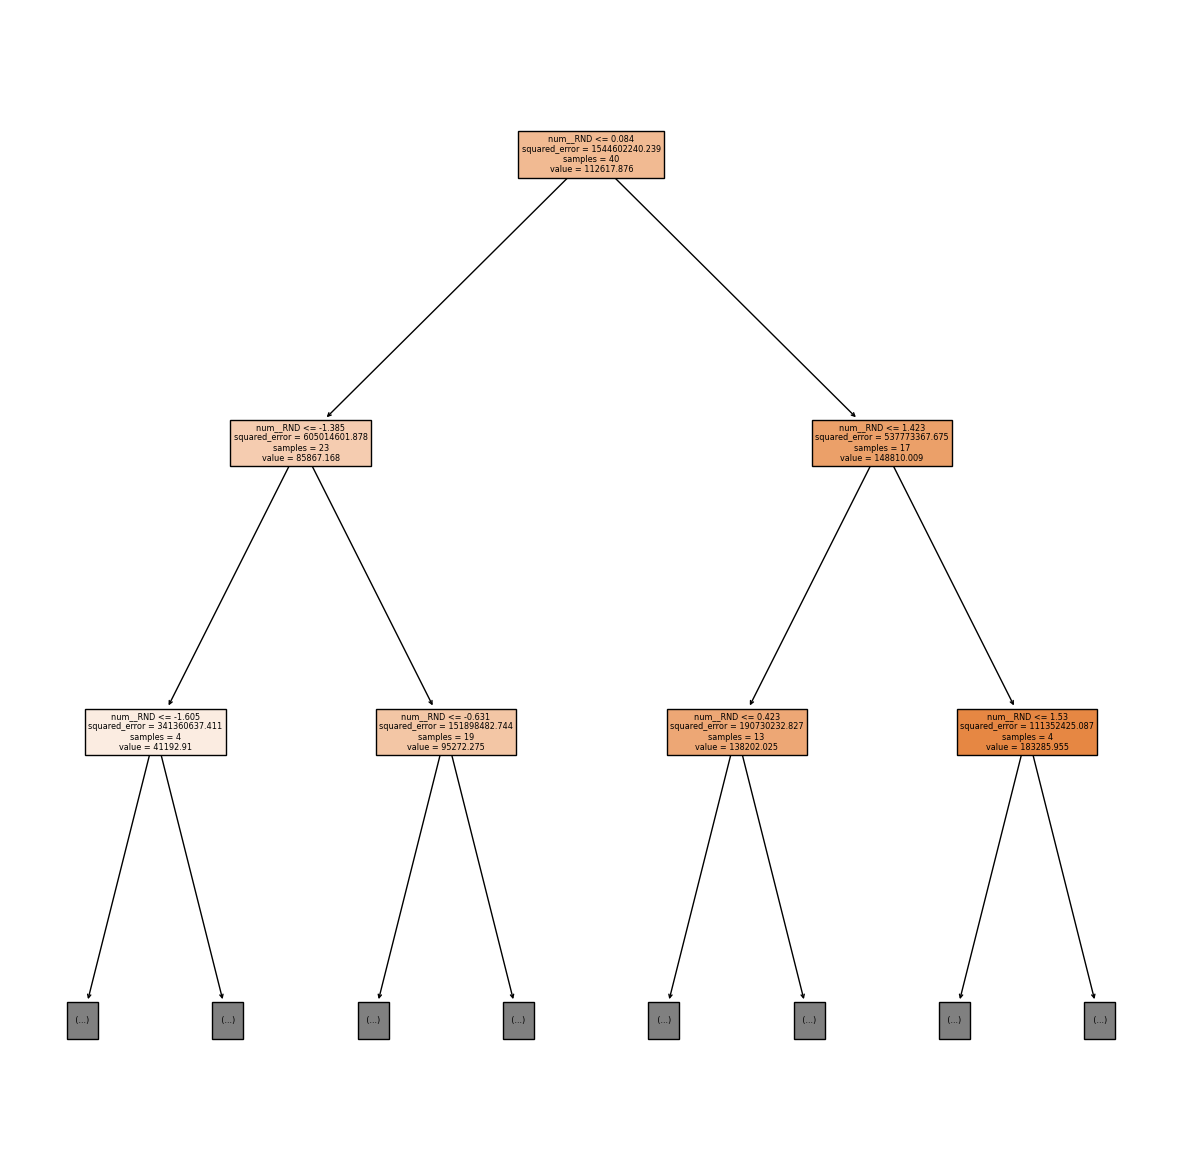

In [121]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(dtr,filled=True,feature_names=list(xtrain.columns),max_depth=2)
plt.show()

### Feature importance

In [122]:
imp =  dtr.feature_importances_
imp
# It will give importance of all the columns for target feature.

array([9.81035984e-01, 9.14095947e-03, 7.93394824e-03, 1.71638855e-03,
       7.52147086e-05, 9.75052393e-05])

In [123]:
imp= pd.Series(imp)
imp.index= xtrain.columns
imp

num__RND                 0.981036
num__ADMIN               0.009141
num__MKT                 0.007934
cat__STATE_California    0.001716
cat__STATE_Florida       0.000075
cat__STATE_New York      0.000098
dtype: float64

In [124]:
imp = imp.sort_values(ascending=False)
imp

num__RND                 0.981036
num__ADMIN               0.009141
num__MKT                 0.007934
cat__STATE_California    0.001716
cat__STATE_New York      0.000098
cat__STATE_Florida       0.000075
dtype: float64

<Axes: title={'center': 'Feature Importace'}>

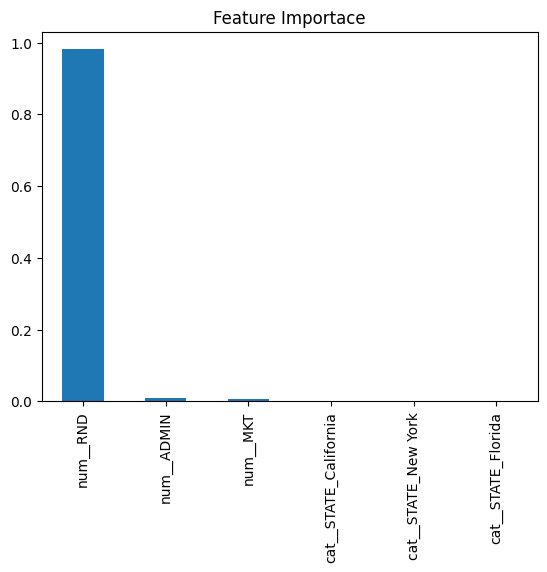

In [125]:
imp.plot(kind='bar',title='Feature Importace')

### MSE,MAE RMSE

In [126]:
ypred_tr= dtr.predict(xtrain)
ypred_ts = dtr.predict(xtest)

In [127]:
ypred_tr

array([ 99937.59, 111313.02, 122776.86, 144259.4 , 110352.25,  96778.92,
       192261.83, 134307.35, 103282.38,  14681.4 ,  78239.91,  64926.08,
        35673.41,  49490.75, 101004.64,  89949.14, 191792.06, 105008.31,
       108552.04,  97427.84, 182901.99, 105733.54, 126992.93,  71498.49,
       156122.51, 124266.9 , 156991.12, 141585.52,  81005.76, 118474.03,
        81229.06,  90708.19,  77798.83, 152211.77, 146121.95,  96712.8 ,
        96479.51, 166187.94, 129917.04, 149759.96])

In [133]:
ypred_ts

array([156122.51,  71498.49,  71498.49, 103282.38, 149759.96, 182901.99,
       103282.38,  97427.84, 129917.04,  14681.4 ])

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mse = mean_squared_error(ytest,ypred_ts)
mse

124818645.90598004

In [129]:
rmse= mse**(1/2)
rmse
# Compare this value with original 'profit value'

11172.226542009432

In [130]:
mae = mean_absolute_error(ytest,ypred_ts)
mae
# Compare this value with original 'profit value'

7576.758000000003

In [131]:
r2 = r2_score(ytest,ypred_ts)
r2

0.9296696063684488

In [136]:
dtr.score(xtest,ytest)
### Check r2 score and dtr.score value this will give same value.

0.9296696063684488

In [71]:
df_pre = x_pre.join(Y)

In [73]:
df_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York,PROFIT
0,2.016411,0.560753,2.153943,0.0,0.0,1.0,192261.83
1,1.955860,1.082807,1.923600,1.0,0.0,0.0,191792.06
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0,191050.39
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0,182901.99
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0,166187.94


In [75]:
df_pre[df_pre['num__RND']<=0.084].mean()

num__RND                    -0.692463
num__ADMIN                  -0.166211
num__MKT                    -0.488150
cat__STATE_California        0.379310
cat__STATE_Florida           0.310345
cat__STATE_New York          0.310345
PROFIT                   85037.441379
dtype: float64

In [135]:
df_pre.to_csv('pre.csv')